In [1]:
!pip install kaggle
dataset_url = "https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset/data"

# Downloading the dataset from Kaggle
import os
os.environ['KAGGLE_USERNAME'] = "your_kaggle_username"  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "your_kaggle_key"  # Replace with your Kaggle API key

!kaggle datasets download -d atharvasoundankar/ai-developer-productivity-dataset --unzip -p ./ai_developer_productivity_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 26.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset
License(s): apache-2.0
  0%|                                               | 0.00/5.85k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 5.85k/5.85k [00:00<00:00, 21.9kB/s]


In [2]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = './ai_developer_productivity_data/'
import os
files = os.listdir(file_path)
files

['ai_dev_productivity.csv']

In [3]:
# Load the CSV file into a DataFrame
data_path = './ai_developer_productivity_data/ai_dev_productivity.csv'
ai_dev_productivity_df = pd.read_csv(data_path)
ai_dev_productivity_df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [4]:
ai_dev_productivity_df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [5]:
# Check for missing values in each column
missing_values = ai_dev_productivity_df.isnull().sum()
missing_values

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

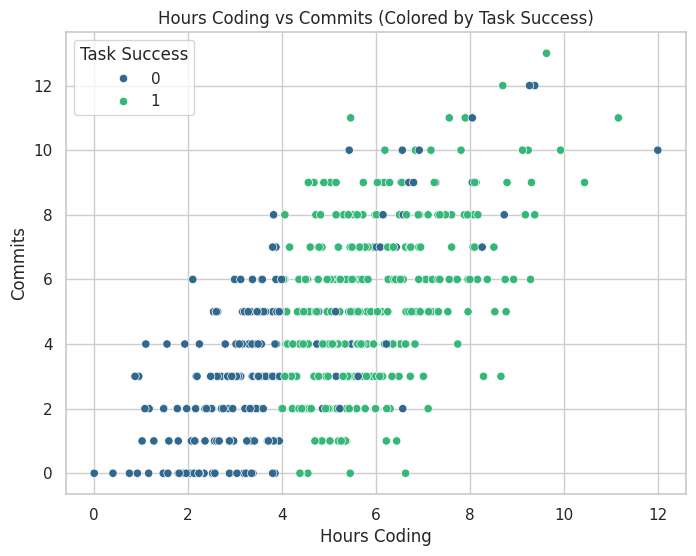

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Relationship between hours_coding and commits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_dev_productivity_df, x="hours_coding", y="commits", hue="task_success", palette="viridis")
plt.title("Hours Coding vs Commits (Colored by Task Success)")
plt.xlabel("Hours Coding")
plt.ylabel("Commits")
plt.legend(title="Task Success", loc="upper left")
plt.show()

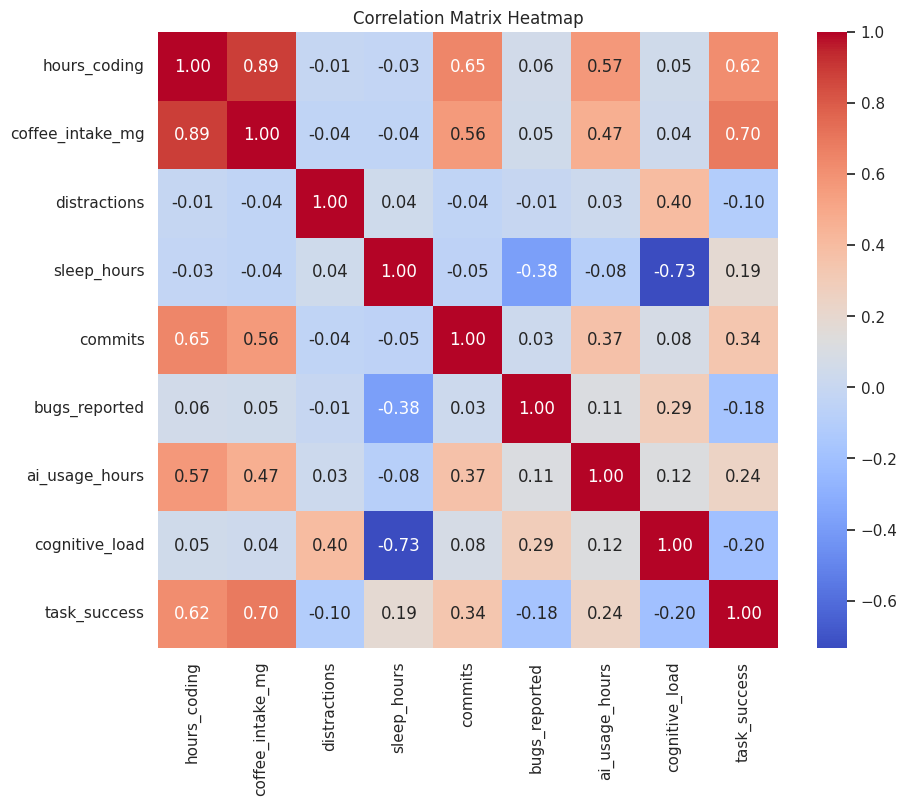

In [7]:
# Generate a correlation matrix
correlation_matrix = ai_dev_productivity_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

/tmp/ipykernel_40/1615342720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ai_dev_productivity_df, x="task_success", y="hours_coding", palette="Set2")


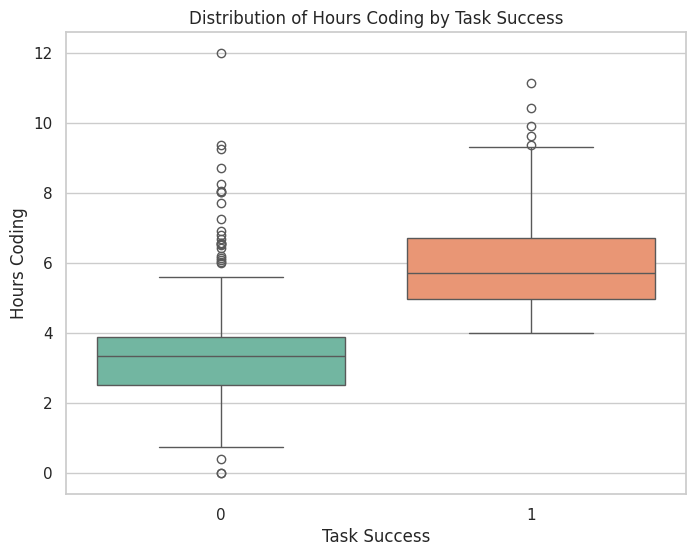

In [8]:
# Plot 2: Distribution of task success across hours_coding
plt.figure(figsize=(8, 6))
sns.boxplot(data=ai_dev_productivity_df, x="task_success", y="hours_coding", palette="Set2")
plt.title("Distribution of Hours Coding by Task Success")
plt.xlabel("Task Success")
plt.ylabel("Hours Coding")
plt.show()

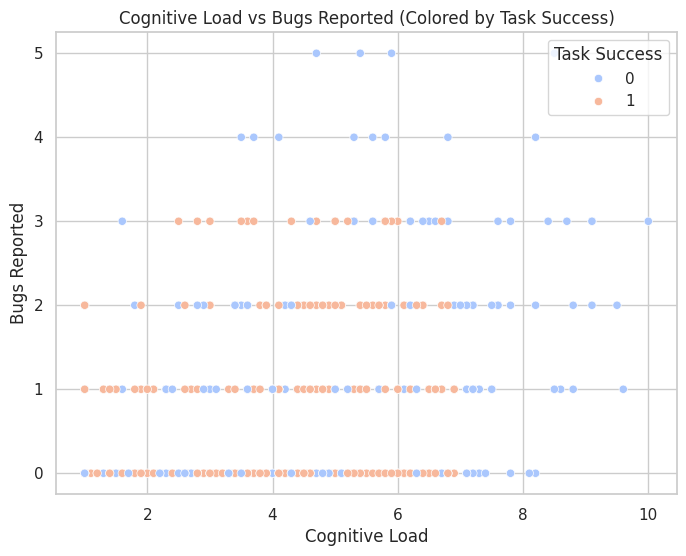

In [9]:
# Plot 3: Relationship between cognitive load and bugs reported
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_dev_productivity_df, x="cognitive_load", y="bugs_reported", hue="task_success", palette="coolwarm")
plt.title("Cognitive Load vs Bugs Reported (Colored by Task Success)")
plt.xlabel("Cognitive Load")
plt.ylabel("Bugs Reported")
plt.legend(title="Task Success", loc="upper right")
plt.show()

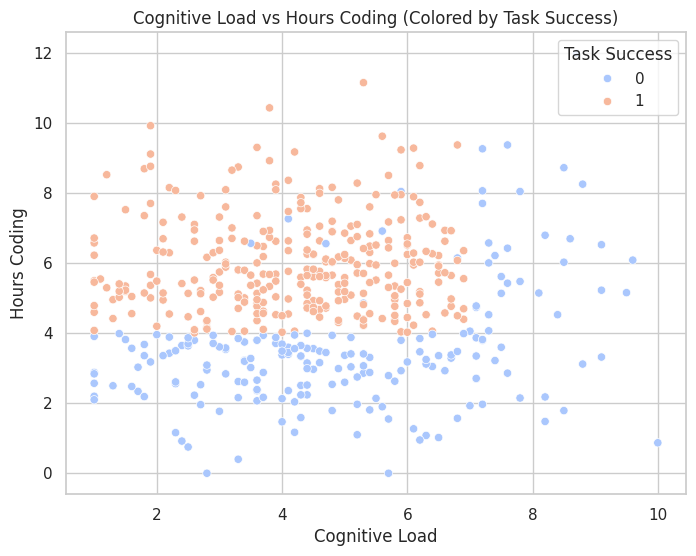

In [10]:
# Plot 4: Relationship between cognitive load and hours coding
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_dev_productivity_df, x="cognitive_load", y="hours_coding", hue="task_success", palette="coolwarm")
plt.title("Cognitive Load vs Hours Coding (Colored by Task Success)")
plt.xlabel("Cognitive Load")
plt.ylabel("Hours Coding")
plt.legend(title="Task Success", loc="upper right")
plt.show()

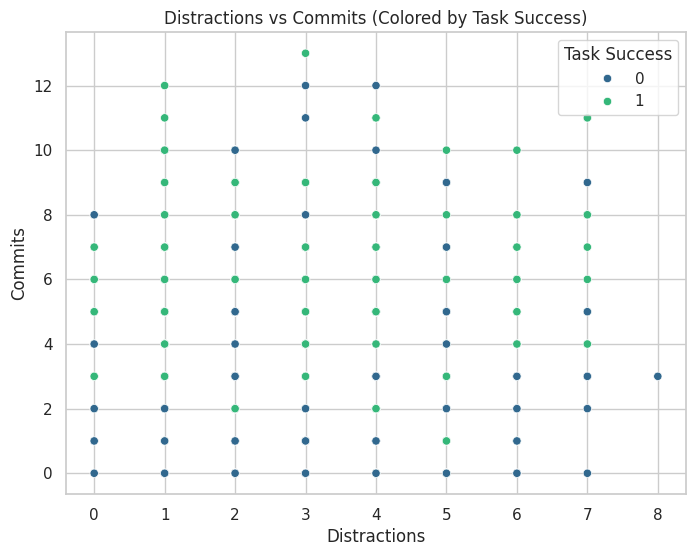

In [11]:
# Plot 5: Relationship between distractions and commits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_dev_productivity_df, x="distractions", y="commits", hue="task_success", palette="viridis")
plt.title("Distractions vs Commits (Colored by Task Success)")
plt.xlabel("Distractions")
plt.ylabel("Commits")
plt.legend(title="Task Success", loc="upper right")
plt.show()

In [12]:
def suggest_optimal_hours(row):
    # Base ideal coding hours
    base_hours = 7.5

    # Adjust based on sleep: less sleep, less optimal hours
    if row['sleep_hours'] < 6:
        base_hours -= 1
    elif row['sleep_hours'] > 8:
        base_hours += 0.5

    if row['hours_coding'] > 8:
        base_hours -= 0.5
    elif row['hours_coding'] < 4:
        base_hours += 0.5

    if row['coffee_intake_mg'] > 520:
        base_hours -= 0.5

    # Adjust based on distractions
    if row['distractions'] > 5:
        base_hours += 0.5

    # Adjust based on AI usage
    if row['ai_usage_hours'] >= 4:
        base_hours -= 0.5  

    # Adjust based on cognitive load
    if row['cognitive_load'] >= 7:
        base_hours -= 1
    elif row['cognitive_load'] <= 3:
        base_hours += 0.5

    # Bound the output between 4 and 10
    return max(4, min(10, round(base_hours, 1)))

# Adding the new column
ai_dev_productivity_df['optimal_hours_tomorrow'] = ai_dev_productivity_df.apply(suggest_optimal_hours, axis=1)


In [ ]:
# Save the updated DataFrame to a new CSV file
output_path = './ai_developer_productivity_data/ai_dev_productivity_updated.csv'
ai_dev_productivity_df.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")

In [13]:
ai_dev_productivity_df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success,optimal_hours_tomorrow
0,5.99,600,1,5.8,2,1,0.71,5.4,1,6.0
1,4.72,568,2,6.9,5,3,1.75,4.7,1,7.0
2,6.30,560,1,8.9,2,0,2.27,2.2,1,8.0
3,8.05,600,7,6.3,9,5,1.40,5.9,0,7.0
4,4.53,421,6,6.9,4,0,1.26,6.3,1,8.0


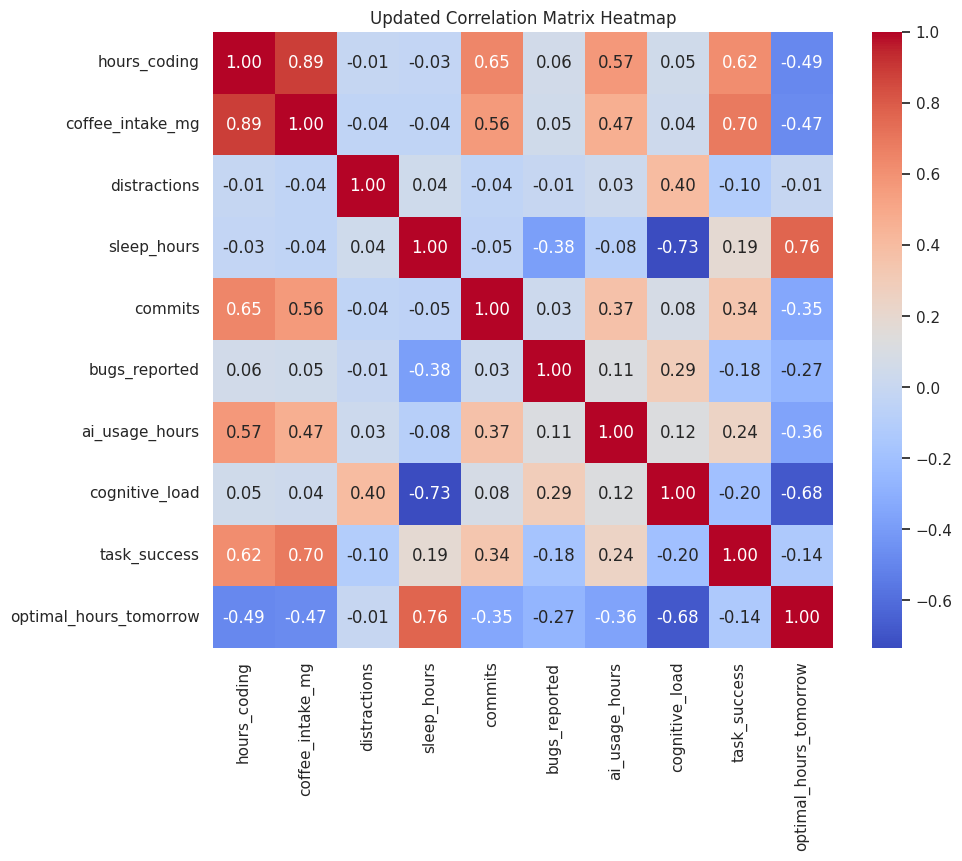

In [14]:
# Update the correlation matrix to include the new feature
correlation_matrix = ai_dev_productivity_df.corr()

# Plot the updated heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Updated Correlation Matrix Heatmap")
plt.show()

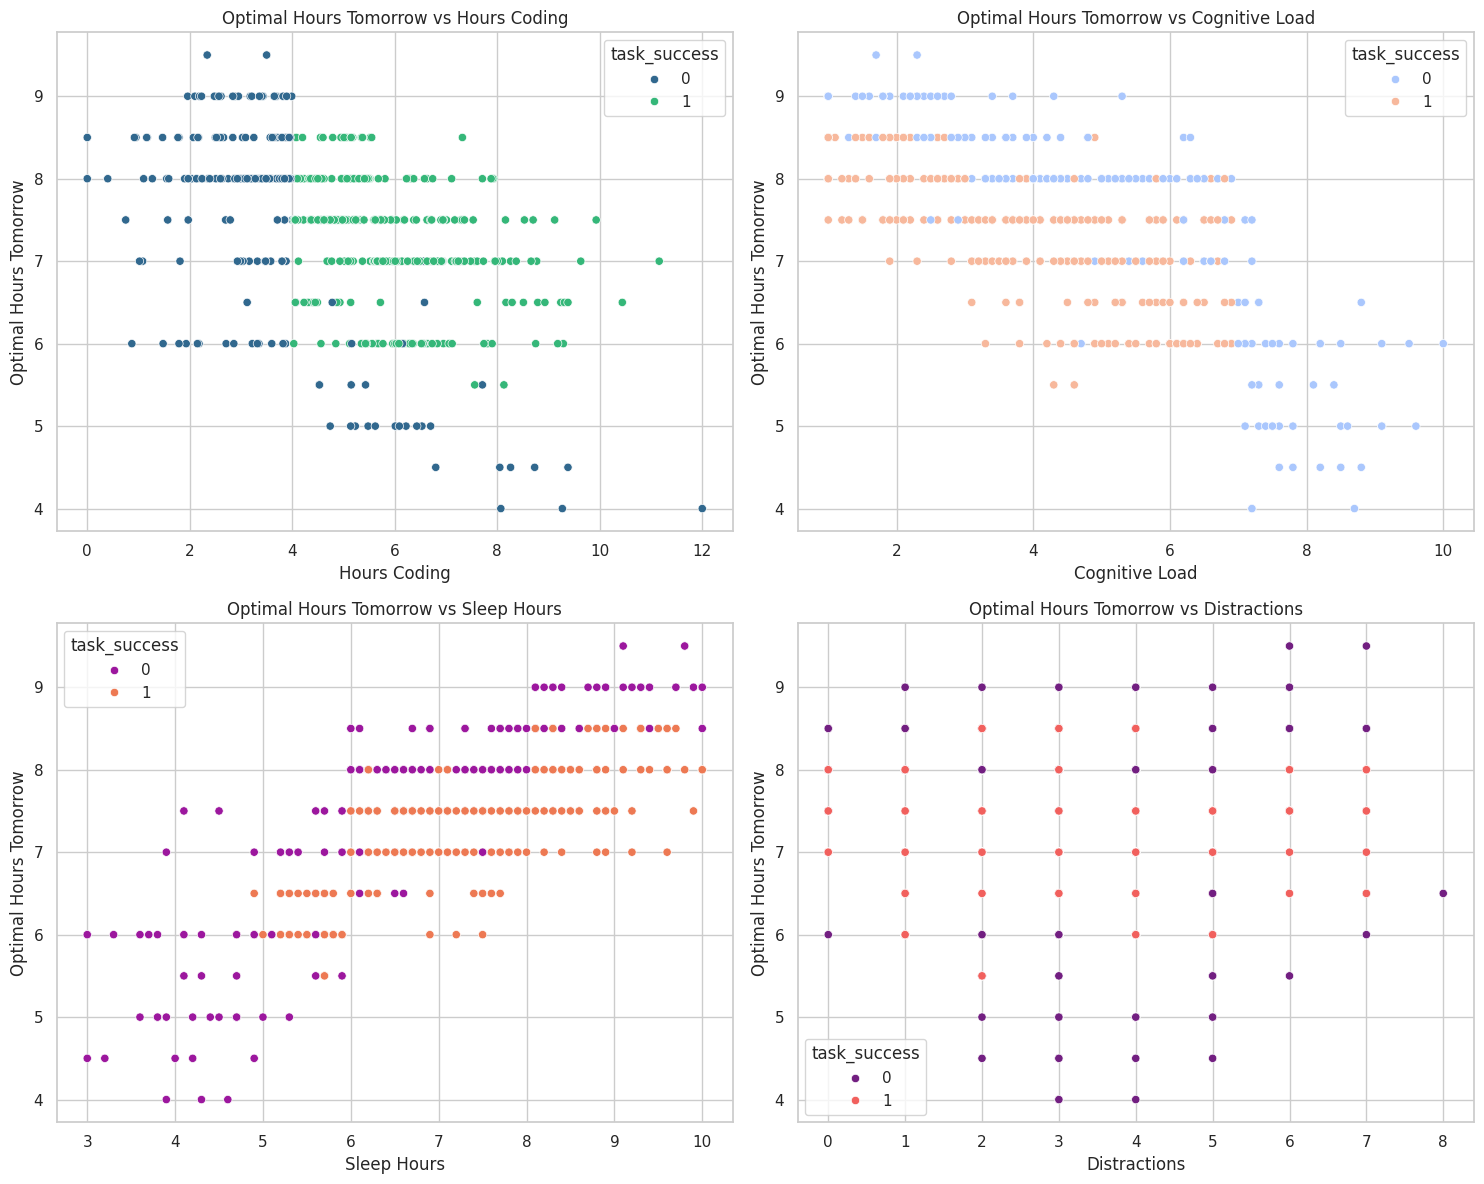

In [15]:
# Create a grid of plots to visualize 'optimal_hours_tomorrow' against major features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Optimal hours vs Hours Coding
sns.scatterplot(ax=axes[0, 0], data=ai_dev_productivity_df, x="hours_coding", y="optimal_hours_tomorrow", hue="task_success", palette="viridis")
axes[0, 0].set_title("Optimal Hours Tomorrow vs Hours Coding")
axes[0, 0].set_xlabel("Hours Coding")
axes[0, 0].set_ylabel("Optimal Hours Tomorrow")

# Plot 2: Optimal hours vs Cognitive Load
sns.scatterplot(ax=axes[0, 1], data=ai_dev_productivity_df, x="cognitive_load", y="optimal_hours_tomorrow", hue="task_success", palette="coolwarm")
axes[0, 1].set_title("Optimal Hours Tomorrow vs Cognitive Load")
axes[0, 1].set_xlabel("Cognitive Load")
axes[0, 1].set_ylabel("Optimal Hours Tomorrow")

# Plot 3: Optimal hours vs Sleep Hours
sns.scatterplot(ax=axes[1, 0], data=ai_dev_productivity_df, x="sleep_hours", y="optimal_hours_tomorrow", hue="task_success", palette="plasma")
axes[1, 0].set_title("Optimal Hours Tomorrow vs Sleep Hours")
axes[1, 0].set_xlabel("Sleep Hours")
axes[1, 0].set_ylabel("Optimal Hours Tomorrow")

# Plot 4: Optimal hours vs Distractions
sns.scatterplot(ax=axes[1, 1], data=ai_dev_productivity_df, x="distractions", y="optimal_hours_tomorrow", hue="task_success", palette="magma")
axes[1, 1].set_title("Optimal Hours Tomorrow vs Distractions")
axes[1, 1].set_xlabel("Distractions")
axes[1, 1].set_ylabel("Optimal Hours Tomorrow")

plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = ai_dev_productivity_df.drop(columns=['optimal_hours_tomorrow'])
y = ai_dev_productivity_df['optimal_hours_tomorrow']

# One-hot encoding for categorical variables if any (currently none in this dataset)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
3,sleep_hours,0.610097
1,coffee_intake_mg,0.142943
0,hours_coding,0.121851
7,cognitive_load,0.098662
2,distractions,0.010057
8,task_success,0.007567
6,ai_usage_hours,0.005787
4,commits,0.002640
5,bugs_reported,0.000395


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train Linear Regression model
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Train Decision Tree Regressor model
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

# Results
{
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2},
    "Decision Tree": {"MSE": decision_tree_mse, "R2": decision_tree_r2}
}

{'Linear Regression': {'MSE': 0.17863020861686485, 'R2': 0.8286356402370828},
 'Decision Tree': {'MSE': 0.04, 'R2': 0.9616270145817345}}

In [18]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 2.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [19]:
from xgboost import XGBRegressor

# Train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

{"MSE": xgb_mse, "R2": xgb_r2}

{'MSE': 0.021256557571643953, 'R2': 0.9796080606565196}

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]  # Note: 'normalize' is deprecated in newer versions of sklearn
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='r2')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

{"Best Parameters": best_params, "Best R2 Score": best_score}

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

{'Best Parameters': {'fit_intercept': True, 'normalize': True},
 'Best R2 Score': 0.8246494512468712}

In [21]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.3/992.3 kB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 48.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


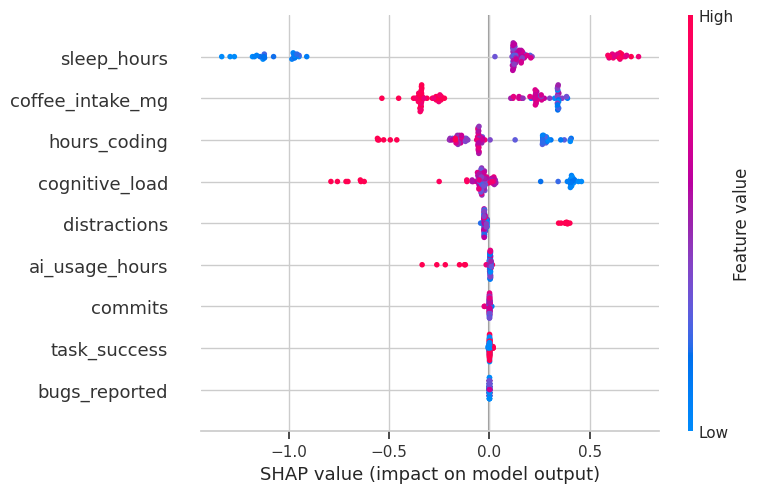

In [22]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test)

In [23]:
import joblib

# Save the XGBoost model to a file
model_filename = "xgboost_model.pkl"
joblib.dump(xgb_model, model_filename)
model_filename

'xgboost_model.pkl'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a595f94-7798-4e91-8650-d6a0f215bbaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>